In [2]:
import numpy as np

class Runge_Cutta:
    def __init__(self, f, x0, y0, h, N):
        self.f = f
        self.y0 = y0
        self.x0 = x0
        self.h = h
        self.N = N

    def explicit_4stage(self):
        ans = np.zeros(self.N)
        net = np.zeros(self.N)
        ans[0] = self.y0
        net[0] = self.x0
        for i in range(1, self.N):
            k1 = self.f(net[i - 1], ans[i - 1])
            k2 = self.f(net[i - 1] + self.h * 0.5, ans[i - 1] + k1 * self.h * 0.5)
            k3 = self.f(net[i - 1] + self.h * 0.5, ans[i - 1] + k2 * self.h * 0.5)
            k4 = self.f(net[i - 1] + self.h, ans[i - 1] + self.h * k3)

            ans[i] = ans[i - 1] + 1/6 * self.h * (k1 + 2*k2 + 2*k3 + k4)
            net[i] = net[i - 1] + self.h
        return ans, net
    
    def implicit_Euler(self, dfuncdx):
        ans = np.zeros(self.N)
        net = np.zeros(self.N)
        ans[0] = self.y0
        net[0] = self.x0
        for i in range(1, self.N):
            net[i] = net[i - 1] + self.h
            ans_new = ans[i - 1]
            f = ans_new - ans[i - 1] - self.h*self.f(net[i], ans_new)
            dfdx = dfuncdx(ans_new, self.h)
            precision = 1e-12
            while abs(f/dfdx) > precision:
                ans_new = ans_new - f/dfdx
                f = ans_new - ans[i - 1] - self.h*self.f(net[i], ans_new)
                dfdx = dfuncdx(ans_new, self.h)
            ans[i] = ans_new
        return ans, net
        

In [71]:
# НА ЭТО ПОКА ЗАБИТЬ

def func(t_new, x_new):
    """ The function f(x) we want the root of."""
    return np.cos(x_new) + np.sin(t_new)

def dfuncdx(x_new, dt):
    """ The derivative of f(x) with respect to x_new."""
    return 1+dt*np.sin(x_new)

RG = Runge_Cutta(func, 1, 1, 0.05, 100)
ans, net = RG.implicit_Euler(dfuncdx)

TypeError: cannot unpack non-iterable NoneType object

In [3]:
import matplotlib.pyplot as plt

In [300]:
def f(x, y):
    return x*y + 1

RG = Runge_Cutta(f, 1, 1, 0.05, 100)
ans, net = RG.solve("explicit_4stage")

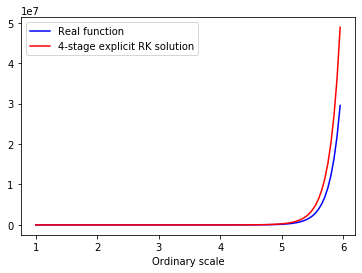

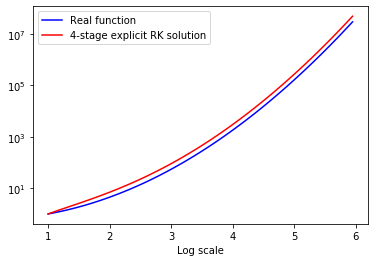

In [301]:
def f_real(x):
    return np.exp(-0.5) * np.exp((x **2)/2)

plt.xlabel("Ordinary scale")
plt.plot(net, f_real(net), 'b')
plt.plot(net, ans, 'r')
plt.legend(["Real function", "4-stage explicit RK solution"])
plt.show()
plt.xlabel("Log scale")
plt.yscale('log')
plt.plot(net, f_real(net), 'b')
plt.plot(net, ans, 'r')
plt.legend(["Real function", "4-stage explicit RK solution"])
plt.show()

In [302]:
n1 = ((ans - f_real(net)) ** 2).sum()
print(n1)

844612608607575.4


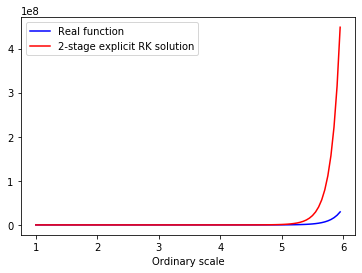

In [308]:
def f(x, y):
    return x*y + 1

RG = Runge_Cutta(f, 1, 1, 0.05, 100)
ans, net = RG.solve("implicit_Euler")

def f_real(x):
    return np.exp(-0.5) * np.exp((x **2)/2)

plt.xlabel("Ordinary scale")
plt.plot(net, f_real(net), 'b')
plt.plot(net, ans, 'r')
plt.legend(["Real function", "2-stage explicit RK solution"])
plt.show()


In [304]:
n2 = ((ans - f_real(net)) ** 2).sum()
n2

473565227000108.9

## Problems


#### Решение очень зависит от шага  - проблема stiff ODE

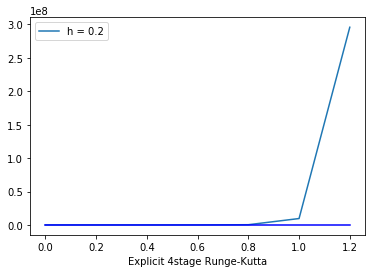

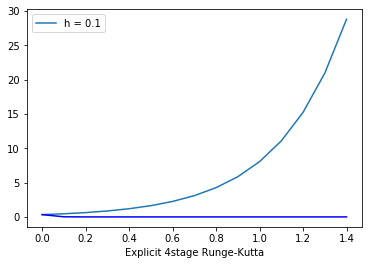

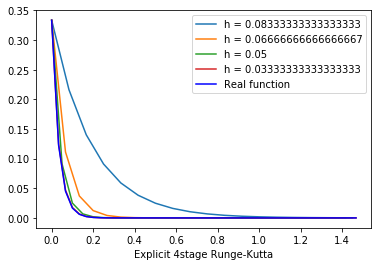

In [73]:
def f(x, y):
    return -30*y

def f_real(x):
    return 1/3 * np.exp(-30*x)

legends = []

for h in [0.2, 0.1, 1/12, 1/15, 1/20, 1/30]:
    RG = Runge_Cutta(f, 0, 1/3, h, int(1.5 / h))
    ans, net = RG.explicit_4stage()
    plt.plot(net, ans)
    if (h == 0.2 or h == 0.1):
        
        plt.plot(net, 1/3 * np.exp(-30*net), 'b')
        plt.legend(["h = {}".format(h)])
        plt.xlabel("Explicit 4stage Runge-Kutta")
        plt.show()
    else:
        legends.append("h = {}".format(h))

plt.plot(net, 1/3 * np.exp(-30*net), 'b')
legends.append("Real function")

plt.legend(legends)
plt.xlabel("Explicit 4stage Runge-Kutta")
plt.show()

#### Implicit Euler solves

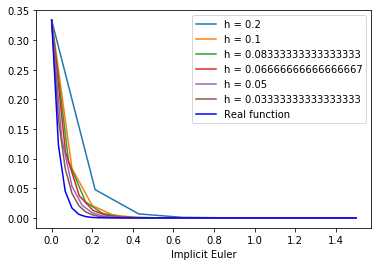

In [51]:
dts = np.array([0.2, 0.1, 1/12, 1/15, 1/20, 1/30])
t_max = 1.5

plt.figure()
legends = []
for i, dt in enumerate(dts):
    N = int(t_max/dt)
    t = np.linspace(0, t_max, N+1)
    x = np.zeros(N+1)
    x[0] = 1 / 3
    
    for n in range(N):
        x[n+1] = x[n]/(1+30*dt)
    
    # Plot the solution
    
    plt.plot(t,x)
    legends.append("h = {}".format(dt))
    
plt.plot(t, 1/3 * np.exp(-30*t), 'b')
legends.append("Real function")

plt.legend(legends)
plt.xlabel("Implicit Euler")
plt.show()

In [197]:
def f(x, y):
    return y ** 2 - y ** 3

RG = Runge_Cutta(f, 0, 0.001, 0.01, 200000)
ans, net = RG.solve()

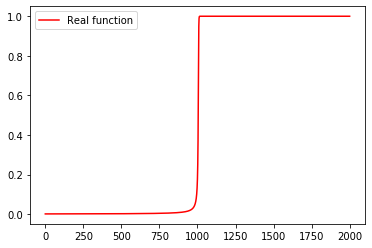

In [198]:
from scipy.special import lambertw
def f_real(x):
    return 1 / lambertw(99*np.exp(99 - x)) + 1

#plt.plot(net, f_real(net), 'b')
plt.plot(net, ans, 'r')
plt.legend(["Real function", "4-stage explicit RK solution"])